In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from DEC import DEC
from datasets import load_mnist

MNIST samples (70000, 784)


/home/mutr_gu/anaconda3/envs/arcgis_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mutr_gu/anaconda3/envs/arcgis_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


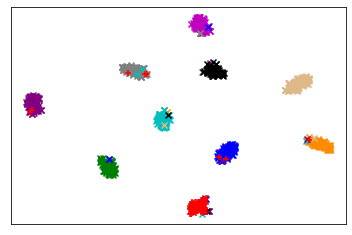

In [2]:
# Load data and choose 1000 samples
X, y = load_mnist()
X = X[1000:2000]
y = y[1000:2000]

# extract features from IDEC model
dec = DEC(dims=[X.shape[-1], 500, 500, 2000, 10])
dec.load_weights('results/DEC_model_final.h5')
features = dec.extract_features(X)

# using tsne to get data points in 2d space
tsne = TSNE(n_iter=100000)
embed_points = tsne.fit_transform(features)

# plot embedded 2d points
fig = plt.figure()
colors = ['darkorange', 'g', 'm', 'gray', 'b', 'c', 'burlywood', 'purple', 'k', 'r']
marker=['x']*9+['+']
for i in range(10):
    plt.scatter(embed_points[y == i, 0], embed_points[y == i, 1], c=colors[i], marker=marker[i], label=str(i))
    plt.xticks(())
    plt.yticks(())
fig.savefig('fig-tsne.pdf', dpi=600)

plt.show()

In [5]:
X.shape[-1]

784

In [7]:
dec.encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 encoder_0 (Dense)           (None, 500)               392500    
                                                                 
 encoder_1 (Dense)           (None, 500)               250500    
                                                                 
 encoder_2 (Dense)           (None, 2000)              1002000   
                                                                 
 encoder_3 (Dense)           (None, 10)                20010     
                                                                 
Total params: 1,665,010
Trainable params: 1,665,010
Non-trainable params: 0
_________________________________________________________________


In [3]:
p = dec.predict(X)

In [6]:
import numpy as np
count_arr = np.bincount(p)
for i in range(10):
    print(i, count_arr[i])

0 103
1 98
2 102
3 95
4 111
5 87
6 99
7 106
8 107
9 92


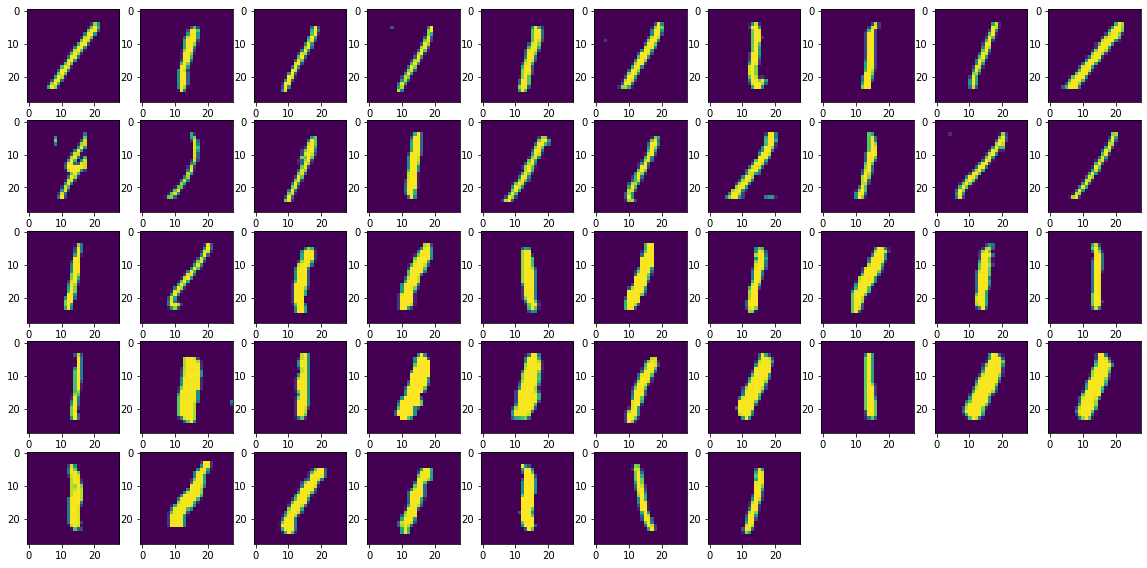

In [11]:
G = len(np.unique(p)) #Number of labels#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(p,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue#Visualisation for clusters = clustplt.figure(figsize=(20,20));
plt.figure(figsize=(20,20));
clust = 2 #enter label number to visualise
num = 48 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i]].reshape(28, 28));
    
plt.show()